In [4]:
import sys
sys.path.append('reflutils')
import reflutils as ru
import numpy as np
from pathlib import Path

%matplotlib widget
from pypxr.structure import *
from pypxr.reflectivity import *
import matplotlib.pyplot as plt
import seaborn as sns
from refnx.dataset import ReflectDataset
from refnx.analysis import Transform, CurveFitter, Objective, GlobalObjective
from refnx._lib.emcee.moves.de import *
import pandas as pd
import pickle
import periodictable.xsf as xsf
sns.set_style("darkgrid")

[None]

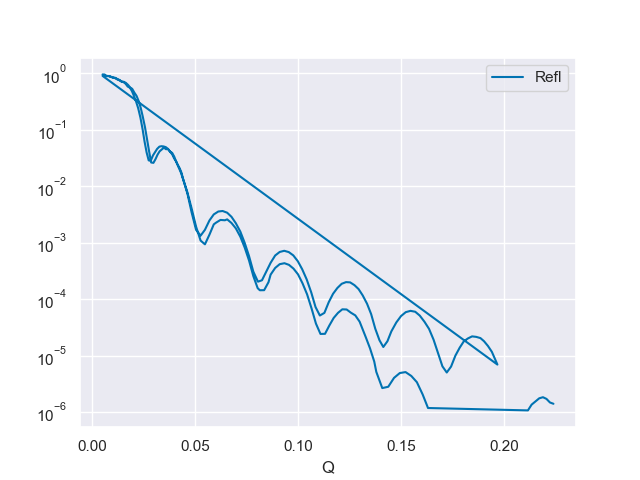

In [17]:
def hdh_path():
    path = (
        Path.home()
        / "Washington State University (email.wsu.edu)"
        / "Carbon Lab Research Group - Documents"
    )
    hdh_path = path / next(path.glob("*Harlan Heilman*"))
    csv = hdh_path / ".refl" / ".csv"
    return csv


d_path = hdh_path()


def ensure_nromalized(refl):
    refl.Refl = refl.Refl / refl.Refl.iloc[0]
    return refl


def to_refnx_dataset(refl, restat=False):
    refl = ensure_nromalized(refl)
    if restat:
        data = (refl.Q, refl.Refl, refl.Refl * 0.1)
    else:
        data = (refl.Q, refl.Refl, refl.Err)
    return ReflectDataset(data)


zrt_rt = pd.concat(
    [
        pd.read_csv(d_path / "zrt_250.0_100.csv", index_col=0),
        pd.read_csv(d_path / "zrt_250.0_190.csv", index_col=0),
    ]
)

zrt_rt = zrt_rt[zrt_rt.Q > 0.005]
zrt_rt = zrt_rt[zrt_rt.Refl > 1e-6]
fig, ax = plt.subplots()
zrt_rt.plot(x="Q", y="Refl", ax=ax, logy=True)
fig.set(dpi=300)

In [19]:
en = 250


def get_delta_beta(n):
    delta = 1 - n.real
    beta = -n.imag
    return delta + 1j * beta


_n_znpc = xsf.index_of_refraction("C32H16N8Zn", density=2.2, energy=en * 1e-3)
n_znpc = get_delta_beta(_n_znpc)
print(f"The isotropic refractive index of ZnPc is {n_znpc}")

The isotropic refractive index of ZnPc is (0.004336366642541112+0.000532266153217245j)


Error plotting BareSi 250.0 100
Error plotting C60-ZnPc 250.0 100
Error plotting C60-ZnPc 250.0 100
Error plotting C60-ZnPc 250.0 100
Error plotting C60-ZnPc 250.0 100
Error plotting C60-ZnPc 283.7 100
Error plotting C60-ZnPc 284.0 100


KeyboardInterrupt: 

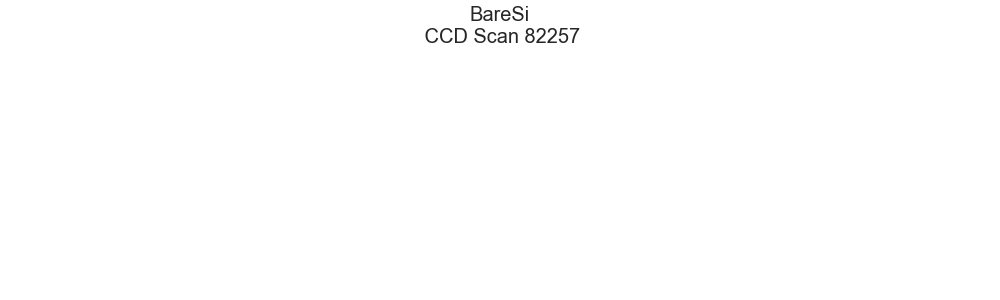

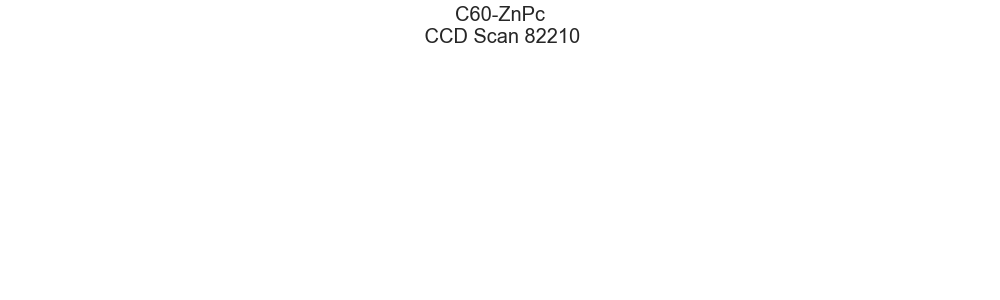

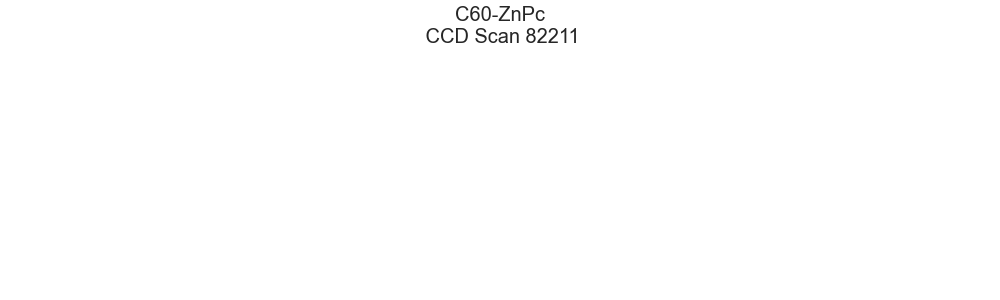

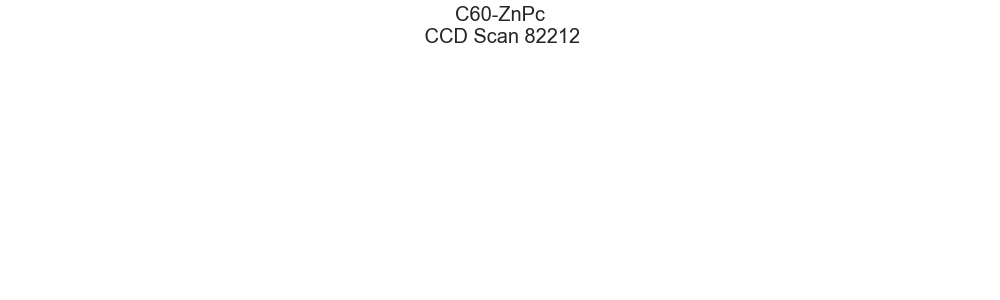

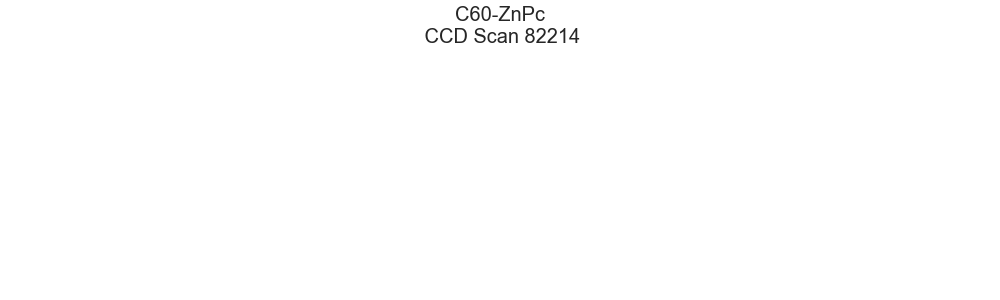

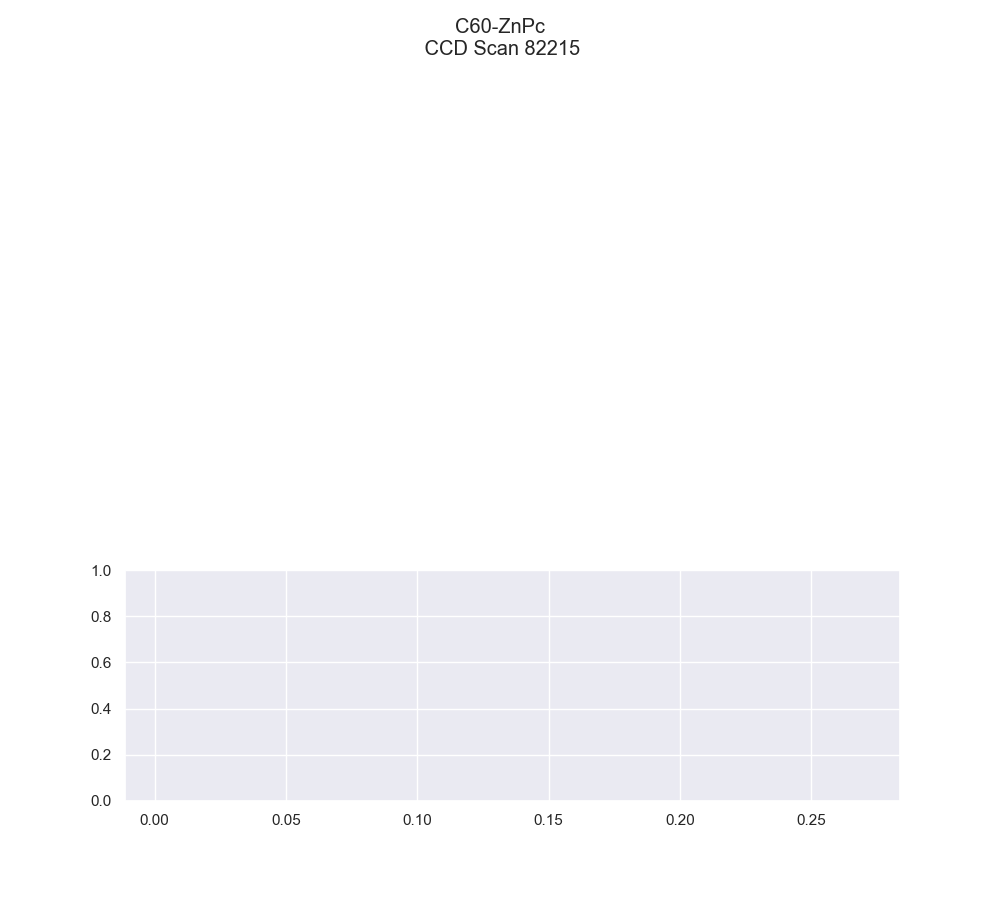

In [3]:
# def plot_sample(sample_path):
#     for scan in sample_path.iterdir():
#         if not scan.is_dir():
#             continue
#         energies = [en for en in scan.iterdir() if en.is_dir()]
#         fig, ax = plt.subplots(
#             nrows=len(energies),
#             figsize=(10, 3 * len(energies)),
#             sharex=True,
#             gridspec_kw={"wspace": 0, "hspace": 0},
#         )
#         fig.suptitle(f"{sample_path.stem}\n {scan.stem}")
#         for i, en in enumerate(energies):
#             if not en.is_dir():
#                 continue
#             for pol in en.iterdir():
#                 if not pol.is_dir():
#                     continue
#                 if isinstance(ax, np.ndarray):
#                     axes = ax[i]
#                 else:
#                     axes = ax
#                 try:
#                     xrr = ru.Refl(path=pol)
#                     xrr.plot(ax=axes, label=f"{en.name} {pol.stem}")
#                     xrr.to_parquet()
#                     xrr.to_csv()
#                 except Exception as e:
#                     print(f"Error plotting {sample_path.stem} {en.name} {pol.stem}")
#                     axes.remove()


# import warnings

# warnings.filterwarnings("ignore")


# # FILEPATH: /c:/Users/Harlan Heilman/CarbonLab/Refl-Utils/src/RoomTempFitting.ipynb
# def plot_bt():
#     processed_path = ru.FileDialog.getDirectory(title="Select Processed Directory")
#     samples = [s for s in processed_path.iterdir() if s.is_dir()]
#     for sample in samples:
#         plot_sample(sample)


# plot_bt()